# PyHRM - High Resolution Melt Analysis in Python

## Introduction

**Hosted at https://github.com/liuyigh/PyHRM **

Please read a very nice introduction provided by Kapa BioSystems to understand, prepare and troubleshoot

http://www.kapabiosystems.com/document/introduction-high-resolution-melt-analysis-guide/


### Import Python modules for analysis

In [ ]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read and Plot Melting Data

Go to [GitHub](https://github.com/liuyigh/PyHRM) to view the format of data file. Basically, it's a CSV file exported from CFX manager data analysis melting curve data "RFU" table (Right click to export to CSV). Open with Excel, delet the empty column. First column "Temperature", each of following columns represent a sample well.

### Select melting range

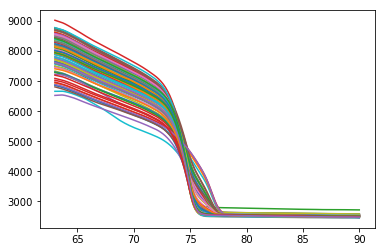

In [34]:
#Read the file
#If you have problems with the reading of the file, add double slashes ( // )
folder = "Z:\Groups\Per Svenningsson\Charbel\Python\HRM\\nder Modification\Quantifications\\170628 - C9-595 in coriell\CSVs"
filename = "\\170628-C9-595incoriellsamples+ladderlawsttworows.csv"
df = pd.read_csv(folder + filename)
plt.plot(df[[0]],df.ix[:,1:])
plt.show()
#print(df)

Based on the plot above, select a range of temperature.

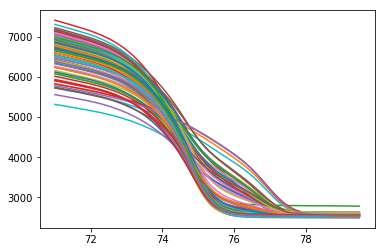

In [35]:
#In the first line, you have two values after an "=", these values set your low and high value. The Region in between
#will be your region of interest.

df_melt=df.ix[(df.iloc[:,0]>=71) & (df.iloc[:,0]<=79.5)]
df_data=df_melt.ix[:,1:]
plt.plot(df_melt[[0]],df_data)
plt.show()
#print(df_melt)

##If you want to export the plot, remove the "#" from line below
#fig = plt.plot(df_melt[[0]],df_data)
#plt.savefig("1.Selected_melting_range.pdf")

### Normalizing 

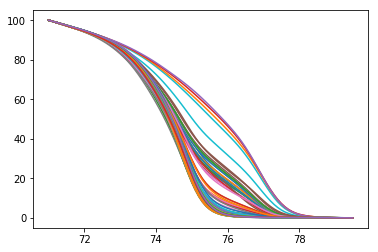

In [36]:
df_norm= (df_data - df_data.min()) / (df_data.max()-df_data.min())*100
df_normtemp= (df_melt - df_melt.min()) / (df_melt.max()-df_melt.min())*100
plt.plot(df_melt[[0]],df_norm)
plt.show()
#Print(df_normtemp)

##If you want to export the plot, remove the "#" from lines below
#ig = plt.plot(df_melt[[0]],df_norm)
#plt.savefig("2.Normalized_melting_range.pdf")

### Making df to array

In [37]:
array_normtemp = df_normtemp.as_matrix()
print(array_normtemp)

[[  0.00000000e+00   1.00000000e+02   1.00000000e+02 ...,   1.00000000e+02
    1.00000000e+02   1.00000000e+02]
 [  1.17647059e+00   9.95090936e+01   9.95018930e+01 ...,   9.95197016e+01
    9.95167333e+01   9.95181083e+01]
 [  2.35294118e+00   9.89949704e+01   9.89877205e+01 ...,   9.90362309e+01
    9.90017323e+01   9.90207824e+01]
 ..., 
 [  9.76470588e+01   4.66281175e-02   2.17485487e-02 ...,   2.30876884e-03
    1.60775037e-02   4.28488583e-02]
 [  9.88235294e+01   2.16869543e-02   1.33292363e-02 ...,   0.00000000e+00
    5.45177083e-03   2.21295936e-02]
 [  1.00000000e+02   0.00000000e+00   0.00000000e+00 ...,   2.98551072e-03
    0.00000000e+00   0.00000000e+00]]


In [38]:
#np.savetxt("array_normtemp.csv", array_normtemp, delimiter=";")

# Transposing the data

In [39]:
transposed_array_normtemp = np.transpose(array_normtemp)
np.savetxt("transposed_array_normtemp.csv", transposed_array_normtemp, delimiter=";")

# Calculating the area under the curve

In [40]:
y = array_normtemp[0]
y = y.size

well_ref = list(df_normtemp)
well_ref = np.matrix(well_ref)

print(well_ref)

AUC_values = np.zeros((y,1))
for i in range(0,y):
    x = 0 + i
    #i = np.trapz(transposed_array_normtemp[x], transposed_array_normtemp[0])
    AUC_values[i] = np.trapz(transposed_array_normtemp[x], transposed_array_normtemp[0])
    #print(i)

AUC_values = np.transpose(AUC_values)
print(AUC_values)
#AUC_values = np.concatenate((well_ref, AUC_values), axis=1)
#AUC_values = np.transpose(AUC_values)
#print(AUC_values)


[['Temperature' 'A1' 'A2' 'A3' 'A6' 'A7' 'A8' 'A9' 'A10' 'A11' 'A12' 'B1'
  'B2' 'B4' 'B5' 'B6' 'B7' 'B8' 'B9' 'B10' 'B11' 'C2' 'C3' 'C4' 'C5' 'C6'
  'C7' 'C9' 'C10' 'C11' 'C12' 'D1' 'D2' 'D3' 'D4' 'D5' 'D6' 'D7' 'D8' 'D9'
  'D10' 'D11' 'D12' 'E1' 'E2' 'E3' 'E4' 'E5' 'E6' 'E7' 'E8' 'E9' 'E10'
  'E11' 'E12' 'F1' 'F2' 'F3' 'F4' 'F5' 'F6' 'F7' 'F8' 'F9' 'F11' 'G1' 'G2'
  'G3' 'G4' 'G6' 'G7' 'G8' 'G9' 'G10' 'G11' 'G12' 'H1' 'H2' 'H3' 'H4' 'H5'
  'H6' 'H7' 'H8' 'H9' 'H10']]
[[ 5000.          4263.53034823  3737.86710279  3741.52266786
   3684.56222051  3728.4795631   3739.97920692  3756.91250065
   3720.31366198  3838.17067489  4694.00356576  3801.31179783
   3666.97436493  3619.3052258   3701.5746306   4256.71412975
   4091.18106186  3696.8259788   3605.68713513  3709.91004216
   3805.44419446  3706.97583812  4188.36346847  3648.36944403
   3681.89279775  3708.95932686  4332.85274689  3740.74824571
   3734.00347347  3802.81142716  5069.48933921  4173.86448609
   3828.09958203  4132.4180086

## Exporting results

In [42]:
np.savetxt("AUC_results.csv", AUC_values, delimiter=";")